### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [41]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [43]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [44]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [45]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [47]:
data = pd.read_csv('autos.csv')

In [48]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


In [50]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price
count,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892
std,60.622613,39825.955933,73.092598,8024.451993
min,51.000000,5000.000000,1.000000,1.000000
25%,90.000000,100000.000000,92.000000,1750.000000
50%,120.000000,150000.000000,140.000000,4100.000000
75%,160.000000,150000.000000,192.000000,8999.000000
max,589.000000,150000.000000,600.000000,99999.000000


In [51]:
data.nunique()  

brand                  38
model                 249
vehicleType             8
gearbox                 2
fuelType                7
notRepairedDamage       2
powerPS               406
kilometer              13
autoAgeMonths         594
price                4919
dtype: int64

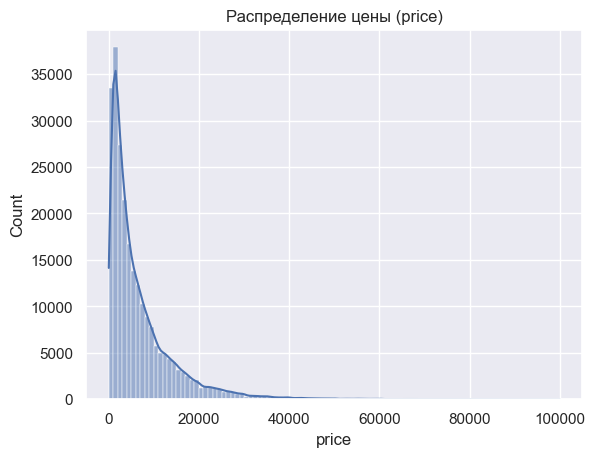

In [52]:
sns.histplot(data['price'], bins=100, kde=True)
plt.title('Распределение цены (price)')
plt.show()

In [53]:
data['price'].skew()

3.0514272240505105

будем логарифмировать, чтобы избавиться от хвоста и больших значений

In [54]:
data['log_price'] = np.log1p(data['price'])

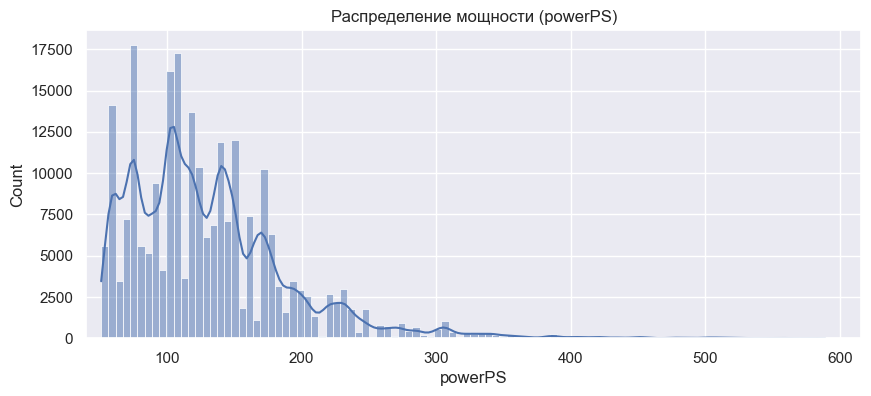

In [55]:
plt.figure(figsize=(10, 4))
sns.histplot(data['powerPS'], bins=100, kde=True)
plt.xlim(40,)
plt.title("Распределение мощности (powerPS)")
plt.show()

думаю отбросить выбросы и нормализацию сделать (ну мб логарфим использовать, если первый вариант не сработает на ура)

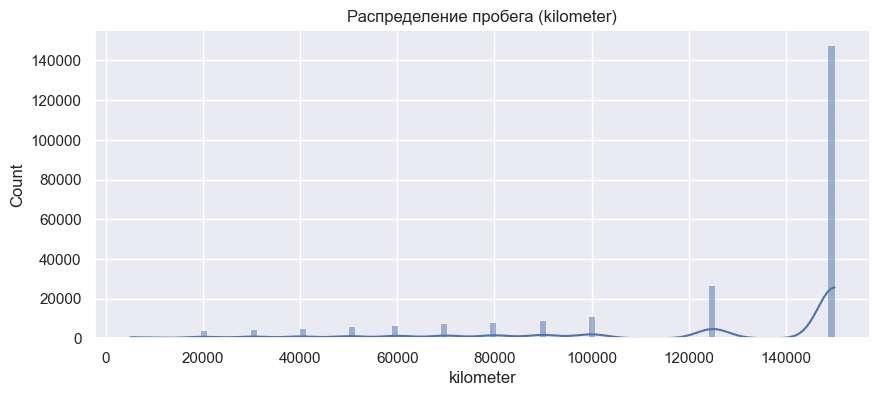

In [56]:
plt.figure(figsize=(10, 4))
sns.histplot(data['kilometer'], bins=100, kde=True)
plt.xlim()
plt.title("Распределение пробега (kilometer)")
plt.show()

ну тут категории

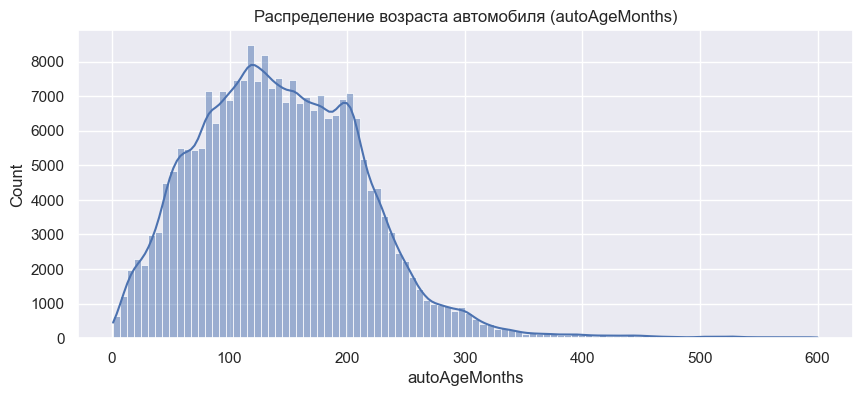

In [57]:
plt.figure(figsize=(10, 4))
sns.histplot(data['autoAgeMonths'], bins=100, kde=True)
plt.xlim()
plt.title("Распределение возраста автомобиля (autoAgeMonths)")
plt.show()

In [58]:
def remove_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"{column}: удалено {len(df) - len(filtered)} строк ({(len(df) - len(filtered)) / len(df):.2%})")
    return filtered


In [59]:
# Удаляем выбросы по powerPS
data = remove_outliers_iqr(data, 'powerPS')

# Удаляем выбросы по autoAgeMonths
data = remove_outliers_iqr(data, 'autoAgeMonths')

powerPS: удалено 8065 строк (3.34%)
autoAgeMonths: удалено 2619 строк (1.12%)


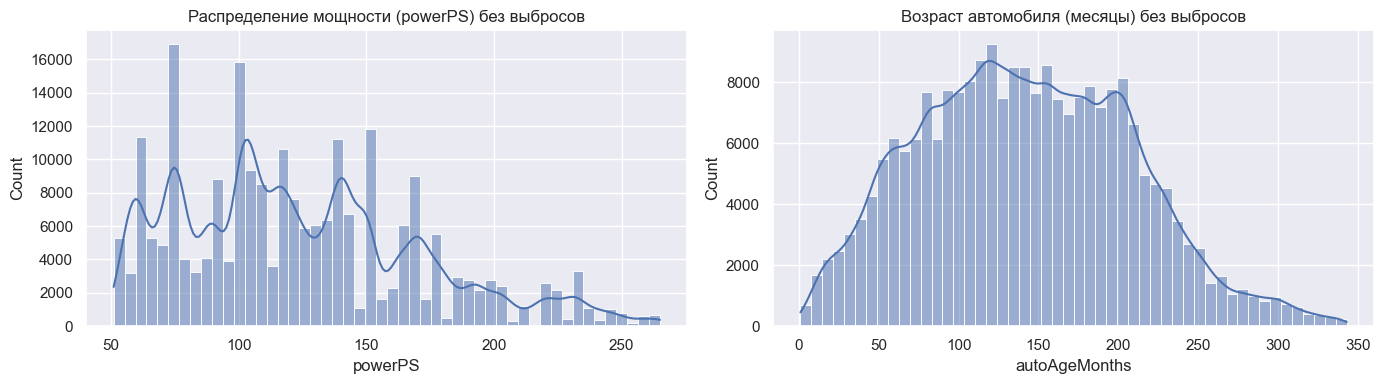

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(data['powerPS'], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Распределение мощности (powerPS) без выбросов")

sns.histplot(data['autoAgeMonths'], bins=50, ax=axes[1], kde=True)
axes[1].set_title("Возраст автомобиля (месяцы) без выбросов")

plt.tight_layout()
plt.show()


ради интереса посмотрел на результат)

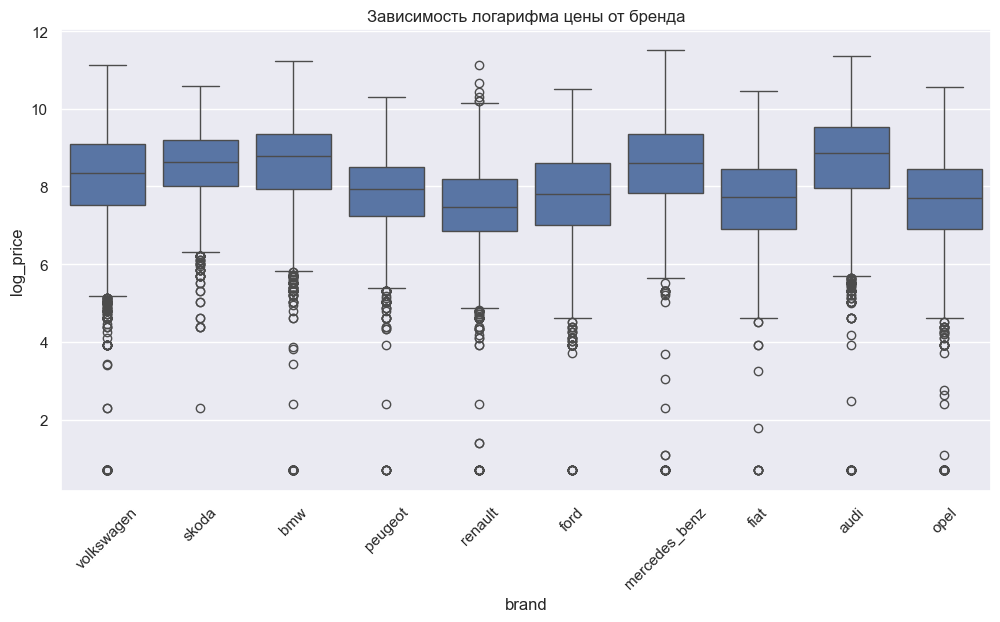

In [61]:
top_brands = data['brand'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[data['brand'].isin(top_brands)], x='brand', y='log_price')
plt.title("Зависимость логарифма цены от бренда")
plt.xticks(rotation=45)
plt.show()

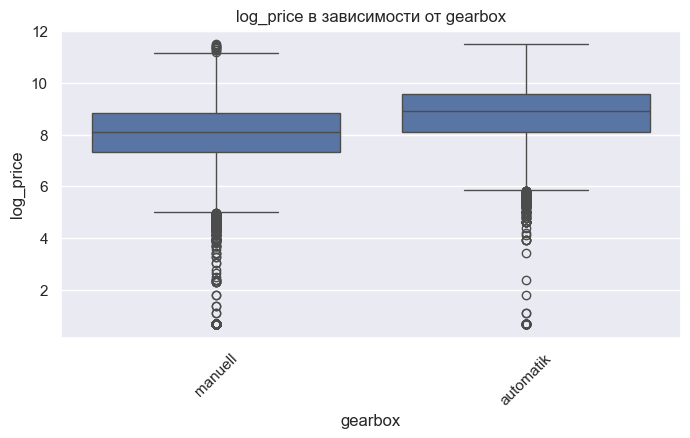

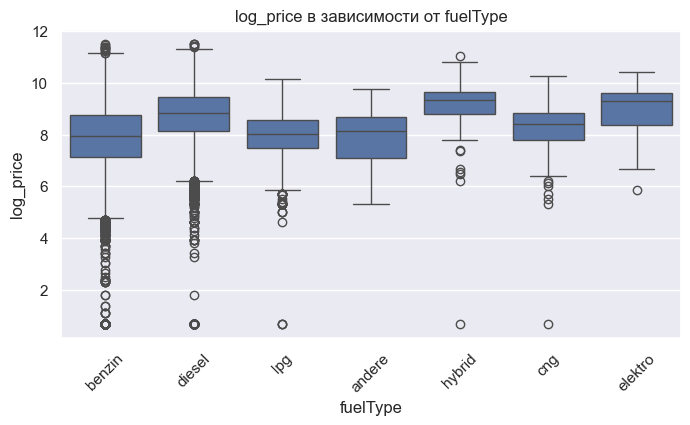

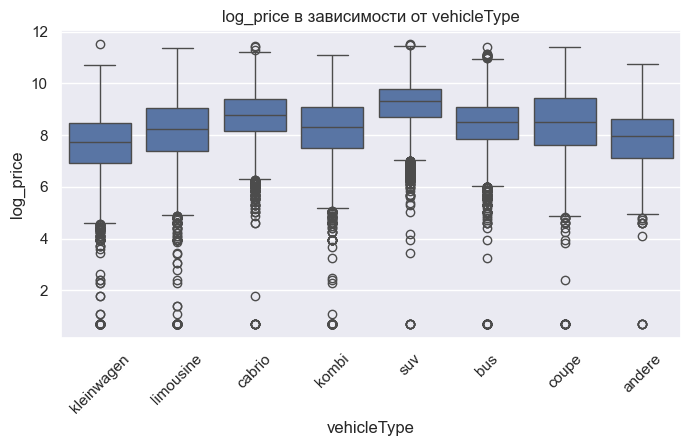

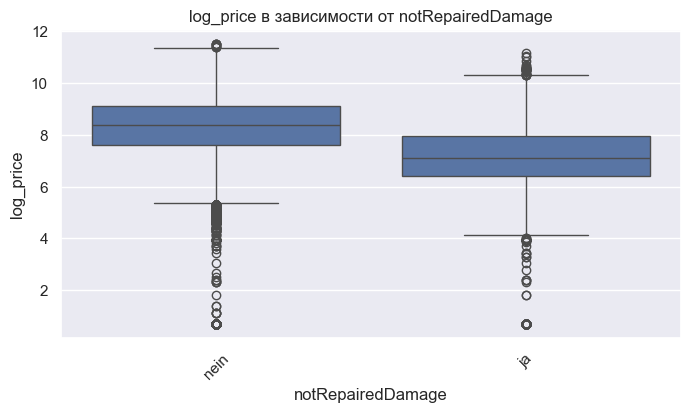

In [62]:
for col in ['gearbox', 'fuelType', 'vehicleType', 'notRepairedDamage']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=col, y='log_price')
    plt.title(f'log_price в зависимости от {col}')
    plt.xticks(rotation=45)
    plt.show()


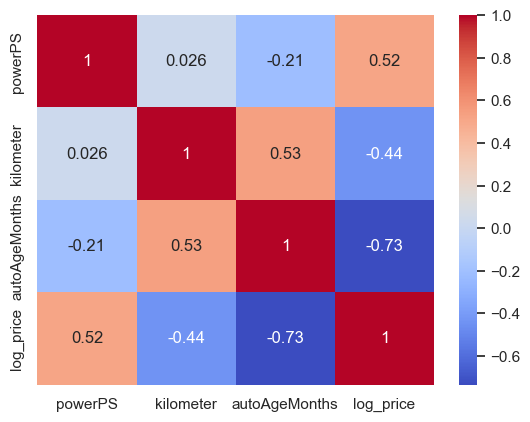

In [63]:
sns.heatmap(data[['powerPS', 'kilometer', 'autoAgeMonths', 'log_price']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [64]:
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'kilometer']
numeric = ['powerPS', 'autoAgeMonths']
other = []




In [65]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [67]:
y = y.to_numpy()

In [68]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ (data split into train/val/test):
from sklearn.model_selection import train_test_split


# Train / Temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    x, y, test_size=0.2, random_state=777
)

# Val / Test из Temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=777
)

# Проверим размеры
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Val:   {X_val.shape}, {y_val.shape}")
print(f"Test:  {X_test.shape}, {y_test.shape}")


Train: (184404, 73), (184404,)
Val:   (23051, 73), (23051,)
Test:  (23051, 73), (23051,)


## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [69]:
def clean_data(X, y):
    X = np.array(X, dtype=np.float64)
    y = np.array(y, dtype=np.float64)

    X[~np.isfinite(X)] = np.nan
    y[~np.isfinite(y)] = np.nan

    valid_mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
    return X[valid_mask], y[valid_mask]

try:
    X_train, y_train = clean_data(X_train, y_train)
    X_val, y_val = clean_data(X_val, y_val)
except Exception as e:
    print(f"Ошибка при очистке данных: {str(e)}")
    raise


print(f"Размеры после очистки: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Размеры после очистки: X_val {X_val.shape}, y_val {y_val.shape}")

Размеры после очистки: X_train (184404, 73), y_train (184404,)
Размеры после очистки: X_val (23051, 73), y_val (23051,)



Testing descent method: full


Lambda tuning for full: 100%|██████████| 10/10 [00:56<00:00,  5.64s/it]



Testing descent method: stochastic


Lambda tuning for stochastic: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]



Testing descent method: momentum


Lambda tuning for momentum: 100%|██████████| 10/10 [00:55<00:00,  5.54s/it]



Testing descent method: adam


Lambda tuning for adam: 100%|██████████| 10/10 [00:54<00:00,  5.41s/it]


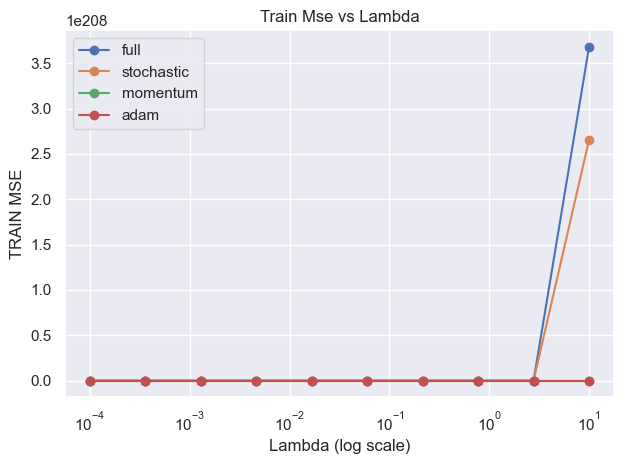

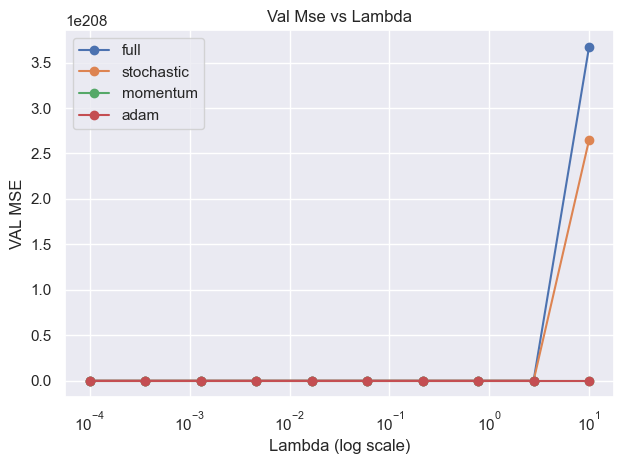

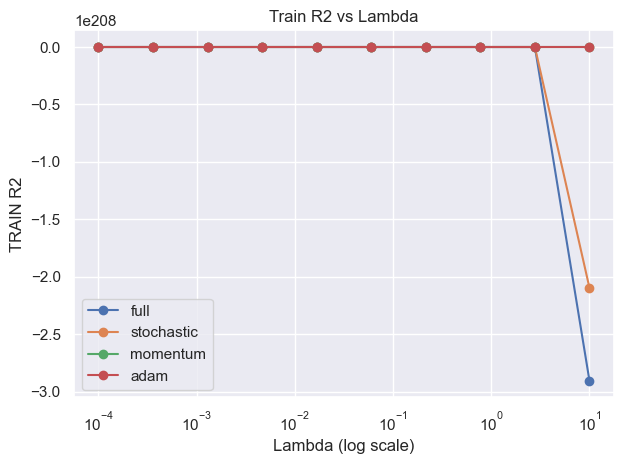

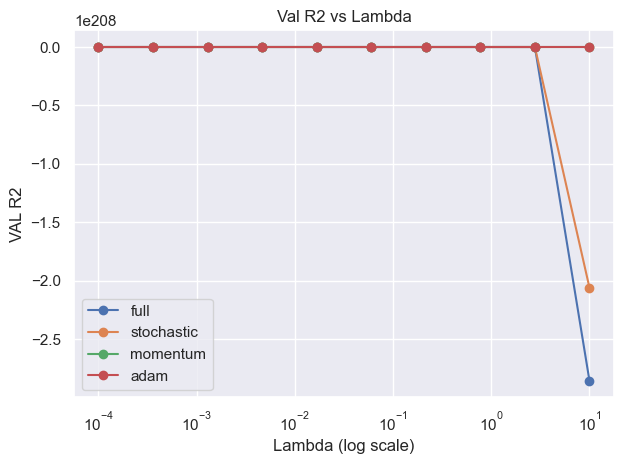

In [96]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from linear_regression import LinearRegression

# Проверка корректности данных
assert X_train.shape[1] == X_val.shape[1], "Train and validation sets must have the same number of features"

# Диапазон λ (регуляризация)
lambda_values = np.logspace(-4, 1, 10)

# Методы градиентного спуска
descent_methods = ["full", "stochastic", "momentum", "adam"]

# Хранилище результатов
method_results = {
    method: {
        "lambda": [],
        "train_mse": [],
        "val_mse": [],
        "train_r2": [],
        "val_r2": [],
        "iterations": []
    } for method in descent_methods
}

# Функция оценки модели
def evaluate_model(model, X_train, y_train, X_val, y_val):
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    return {
        "train_mse": mean_squared_error(y_train, y_train_pred),
        "val_mse": mean_squared_error(y_val, y_val_pred),
        "train_r2": r2_score(y_train, y_train_pred),
        "val_r2": r2_score(y_val, y_val_pred),
        "iterations": len(model.loss_history)
    }

# Основной цикл по методам и λ
for method in descent_methods:
    print(f"\nTesting descent method: {method}")
    for reg_lambda in tqdm(lambda_values, desc=f"Lambda tuning for {method}"):
        config = {
            "descent_name": method,
            "kwargs": {"dimension": X_train.shape[1], "lambda_": reg_lambda}
        }

        model = LinearRegression(descent_config=config, max_iter=100, tolerance=1e-4)
        model.fit(X_train, y_train)
        metrics = evaluate_model(model, X_train, y_train, X_val, y_val)

        for key, value in metrics.items():
            method_results[method][key].append(value)
        method_results[method]["lambda"].append(reg_lambda)

# Построение графиков для сравнения
for metric in ["train_mse", "val_mse", "train_r2", "val_r2"]:
    plt.figure()
    for method in descent_methods:
        plt.plot(
            method_results[method]["lambda"],
            method_results[method][metric],
            label=method,
            marker='o'
        )
    plt.xscale("log")
    plt.xlabel("Lambda (log scale)")
    plt.ylabel(metric.replace("_", " ").upper())
    plt.title(f"{metric.replace('_', ' ').title()} vs Lambda")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
best_lambdas = {}

for method in descent_methods:
    min_mse_idx = np.argmin(method_results[method]["val_mse"])

    best_lambdas[method] = {
        "lambda": method_results[method]["lambda"][min_mse_idx],
        "val_mse": method_results[method]["val_mse"][min_mse_idx],
        "val_r2": method_results[method]["val_r2"][min_mse_idx],
        "iterations": method_results[method]["iterations"][min_mse_idx],
    }

best_lambda_df = pd.DataFrame(best_lambdas).T
best_lambda_df.head()

,lambda,val_mse,val_r2,iterations
full,0.774264,0.305795,0.762121,101.0
stochastic,0.215443,0.380516,0.703995,101.0
momentum,0.774264,0.277561,0.784084,101.0
adam,0.774264,0.274168,0.786724,101.0


### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

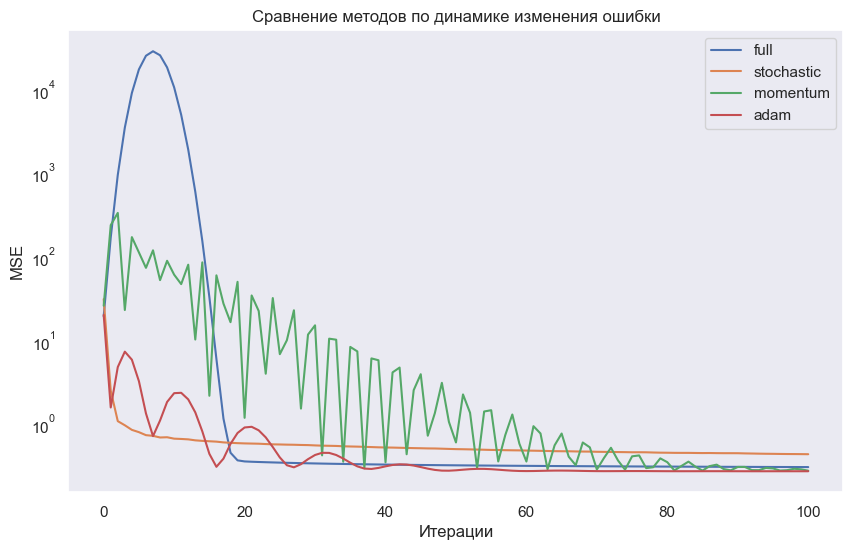

In [ ]:
loss_histories = {}

for method, row in best_lambda_df.iterrows():
    lambda_opt = row["lambda"]

    descent_config = {
        "descent_name": method,
        "kwargs": {
            "dimension": X_train.shape[1],
            "lambda_": lambda_opt,
        }
    }

    model = LinearRegression(descent_config=descent_config, max_iter=100)
    model.fit(X_train, y_train)

    loss_histories[method] = model.loss_history

plt.figure(figsize=(10, 6))

for method, loss_history in loss_histories.items():
    plt.plot(range(len(loss_history)), loss_history, label=method)

plt.xlabel("Итерации")
plt.ylabel("MSE")
plt.yscale("log")
plt.title("Сравнение методов по динамике изменения ошибки")
plt.legend()
plt.grid()
plt.show()

In [85]:
# Функция для определения момента сходимости
def find_convergence_point(loss_history, tolerance=1e-4):
    for i in range(1, len(loss_history)):
        if abs(loss_history[i] - loss_history[i - 1]) < tolerance:
            return i
    return len(loss_history)

# Словарь для хранения количества итераций до сходимости
convergence_results = {}

# Проходим по каждому методу и вычисляем момент сходимости
for method, loss_history in loss_histories.items():
    convergence_results[method] = find_convergence_point(loss_history)

# Создаем DataFrame с результатами
convergence_df = pd.DataFrame.from_dict(convergence_results, orient='index', columns=['Iterations to Converge'])
convergence_df.head()

,Iterations to Converge
full,101
stochastic,83
momentum,101
adam,72


╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ <br>
Метод Adam показал наилучшую сходимость: он быстро снижает ошибку и обеспечивает стабильное обучение. Momentum сходится быстрее, чем обычный градиентный спуск, но демонстрирует колебания. Stochastic работает стабильно, но медленно. Full — самый предсказуемый, но также требует больше итераций. В целом, Adam — лучший выбор по скорости и качеству, особенно при ограниченном числе итераций.

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

Testing batch sizes: 100%|██████████| 50/50 [02:56<00:00,  3.52s/it]


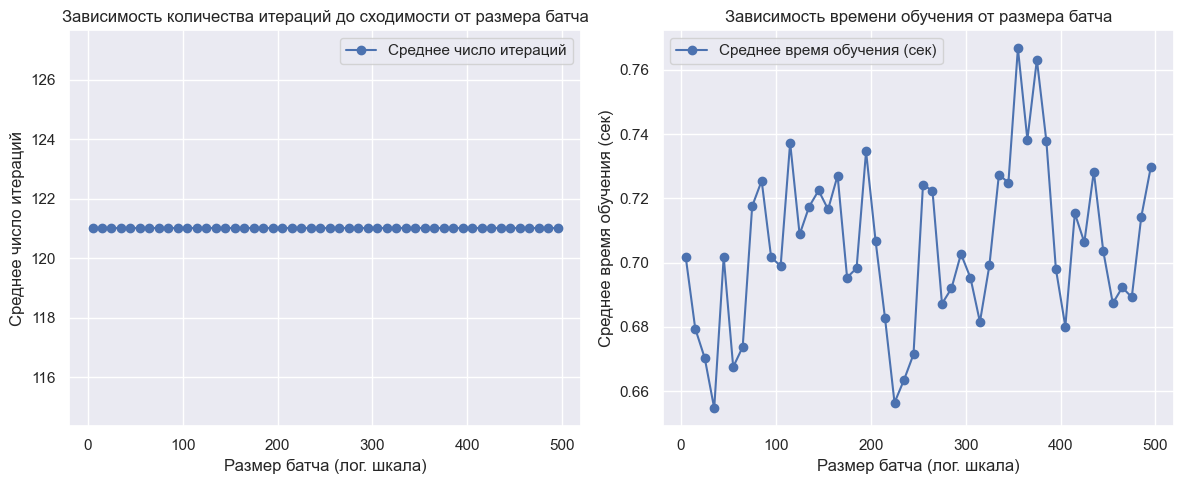

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from linear_regression import LinearRegression

batch_sizes = np.arange(5, 500, 10)
num_runs = 5
tolerance = 1e-4
max_iter = 120

def find_convergence_point(loss_history, tolerance=1e-4):
    for i in range(1, len(loss_history)):
        if abs(loss_history[i] - loss_history[i - 1]) < tolerance:
            return i
    return len(loss_history)

def run_training(batch_size, tolerance, max_iter):
    descent_config = {
        "descent_name": "stochastic",
        "kwargs": {"dimension": X_train.shape[1], "batch_size": batch_size}
    }
    model = LinearRegression(descent_config=descent_config, tolerance=tolerance, max_iter=max_iter)
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    convergence_iter = find_convergence_point(model.loss_history, tolerance)
    return convergence_iter, end - start

results = []

for batch_size in tqdm(batch_sizes, desc="Testing batch sizes"):
    iterations, times = [], []

    for _ in range(num_runs):
        try:
            conv_iter, duration = run_training(batch_size, tolerance, max_iter)
            iterations.append(conv_iter)
            times.append(duration)
        except Exception as e:
            print(f"Ошибка при batch_size={batch_size}: {e}")
            continue

    results.append({
        "batch_size": batch_size,
        "avg_iterations": np.mean(iterations),
        "avg_time": np.mean(times)
    })

df_results = pd.DataFrame(results)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(df_results["batch_size"], df_results["avg_iterations"], marker="o", label="Среднее число итераций")
axes[0].set_xlabel("Размер батча (лог. шкала)")
axes[0].set_ylabel("Среднее число итераций")
axes[0].set_title("Зависимость количества итераций до сходимости от размера батча")
axes[0].set_xscale("log")
axes[0].legend()
axes[0].grid(True)

# График времени
axes[1].plot(df_results["batch_size"], df_results["avg_time"], marker="o", label="Среднее время обучения (сек)")
axes[1].set_xlabel("Размер батча (лог. шкала)")
axes[1].set_ylabel("Среднее время обучения (сек)")
axes[1].set_title("Зависимость времени обучения от размера батча")
axes[1].set_xscale("log")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ<br>
Оптимальный размер батча — в районе 30–50, поскольку он обеспечивает наименьшее время обучения без увеличения числа итераций. Маленькие батчи требуют больше времени из-за неэффективности вычислений, а большие — из-за роста затрат на один шаг градиентного спуска.

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [ ]:
# #╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
# from descents import get_descent

# descent_config = {
#     "descent_name": "full",
#     "regularized": True,
#     "kwargs": {"dimension": 10, "lambda_": 0.01, "mu": 0.1}
# }
# descent = get_descent(descent_config)
# print(type(descent))

<class 'descents.VanillaGradientDescentReg'>


In [99]:
from descents import (
    VanillaGradientDescentReg, StochasticDescentReg, MomentumDescentReg, AdamReg,
    VanillaGradientDescent, StochasticDescent, MomentumDescent, Adam
)
from linear_regression import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


lambda_values = np.logspace(-4, 1, 5)
mu_values = np.logspace(-4, 1, 5)

descent_mapping = {
    'full': VanillaGradientDescent,
    'stochastic': StochasticDescent,
    'momentum': MomentumDescent,
    'adam': Adam,
    'full_reg': VanillaGradientDescentReg,
    'stochastic_reg': StochasticDescentReg,
    'momentum_reg': MomentumDescentReg,
    'adam_reg': AdamReg
}


def run_descent(method_name: str, lambda_: float, mu: float = None):
    descent_config = {
        "descent_name": method_name.replace("_reg", ""),
        "regularized": "reg" in method_name,
        "kwargs": {
            "dimension": X_train.shape[1],
            "lambda_": lambda_
        }
    }
    if "reg" in method_name:
        descent_config["kwargs"]["mu"] = mu

    model = LinearRegression(descent_config=descent_config, max_iter=200, tolerance=1e-4)
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    if not hasattr(model.descent, 'w') or model.descent.w is None:
        raise ValueError("Weights not initialized")

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return {
        "method": method_name,
        "lambda": lambda_,
        "mu": mu,
        "train_mse": mean_squared_error(y_train, y_train_pred),
        "test_mse": mean_squared_error(y_test, y_test_pred),
        "train_r2": r2_score(y_train, y_train_pred),
        "test_r2": r2_score(y_test, y_test_pred),
        "iterations": len(model.loss_history),
        "time": end - start
    }


results = []

for method_name in descent_mapping:
    print(f"Testing descent method: {method_name}")
    for lambda_ in tqdm(lambda_values, desc=f"Lambda tuning for {method_name}", leave=False):
        for mu in (mu_values if "reg" in method_name else [None]):
            try:
                result = run_descent(method_name, lambda_, mu)
                results.append(result)
            except Exception as e:
                print(f"Ошибка: {method_name} | λ={lambda_} | μ={mu} → {e}")
                continue


df_results = pd.DataFrame(results)
print(df_results.head())


Testing descent method: full


Lambda tuning for full:  80%|████████  | 4/5 [00:46<00:11, 11.58s/it]C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\rshir\ML4\descents.py:203: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y) ** 2)
C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:570: RuntimeWarning: overflow encountered in square
  output_e

Testing descent method: stochastic


Lambda tuning for stochastic:  80%|████████  | 4/5 [00:04<00:01,  1.21s/it]C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\rshir\ML4\descents.py:203: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y) ** 2)
C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:570: RuntimeWarning: overflow encountered in square
  ou

Testing descent method: momentum


Lambda tuning for momentum:  80%|████████  | 4/5 [00:44<00:11, 11.18s/it]C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\rshir\ML4\descents.py:203: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y) ** 2)
C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:570: RuntimeWarning: overflow encountered in square
  outp

Testing descent method: adam


Testing descent method: full_reg


Lambda tuning for full_reg:  80%|████████  | 4/5 [03:37<00:52, 52.47s/it]C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\rshir\ML4\descents.py:203: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y) ** 2)
C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\rshir\ML4\descents.py:580: RuntimeWarning: overflow encountered in square
  reg_loss = 0.5 * self.mu * np.sum(self.w ** 2)
C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\

Testing descent method: stochastic_reg


Lambda tuning for stochastic_reg:  80%|████████  | 4/5 [00:22<00:05,  5.50s/it]C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\rshir\ML4\descents.py:203: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y) ** 2)
c:\Users\rshir\ML4\descents.py:580: RuntimeWarning: overflow encountered in square
  reg_loss = 0.5 * self.mu * np.sum(self.w ** 2)
C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Pyth

Testing descent method: momentum_reg


Lambda tuning for momentum_reg:  80%|████████  | 4/5 [03:45<00:56, 56.82s/it]C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\rshir\ML4\descents.py:203: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y) ** 2)
C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\rshir\ML4\descents.py:580: RuntimeWarning: overflow encountered in square
  reg_loss = 0.5 * self.mu * np.sum(self.w ** 2)
C:\Users\rshir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python

Testing descent method: adam_reg


  method     lambda  mu  train_mse   test_mse   train_r2    test_r2  \
0   full   0.000100 NaN  32.508635  32.615072 -24.649563 -25.034034   
1   full   0.001778 NaN   8.102781   8.199259  -5.393157  -5.544820   
2   full   0.031623 NaN   0.771655   0.750648   0.391158   0.400817   
3   full   0.562341 NaN   0.305097   0.285696   0.759276   0.771952   
4   full  10.000000 NaN        inf        inf       -inf       -inf   

   iterations       time  
0         201  11.571530  
1         201  11.345311  
2         201  11.590947  
3         201  11.664529  
4         201  11.867156  


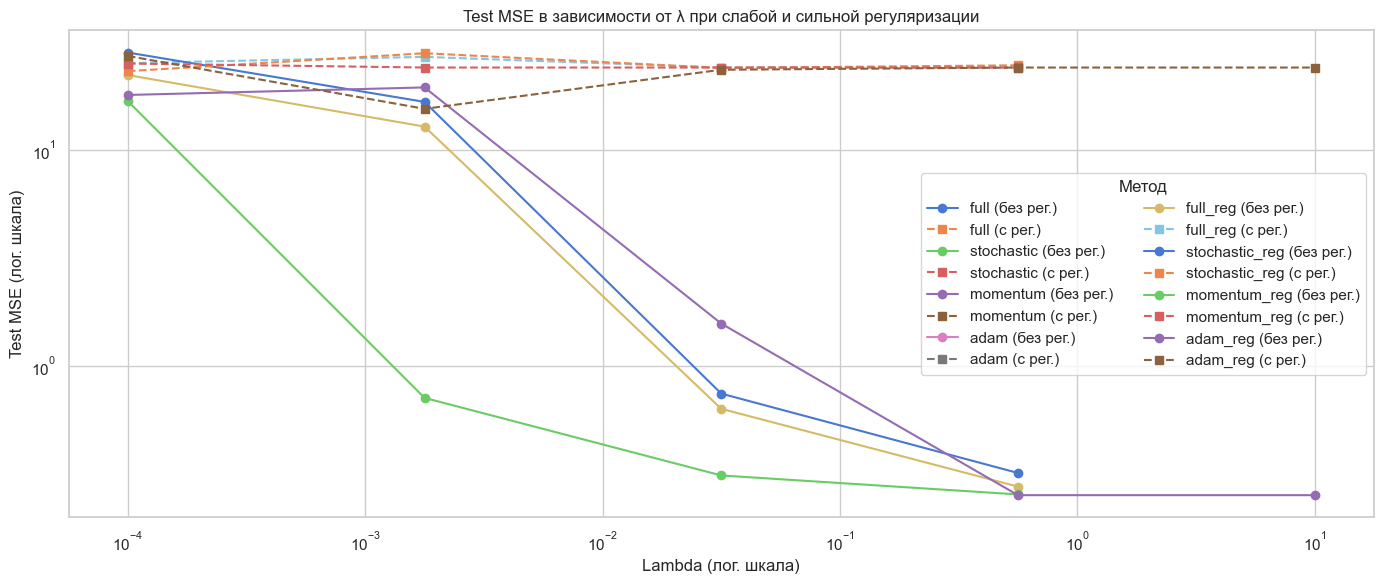

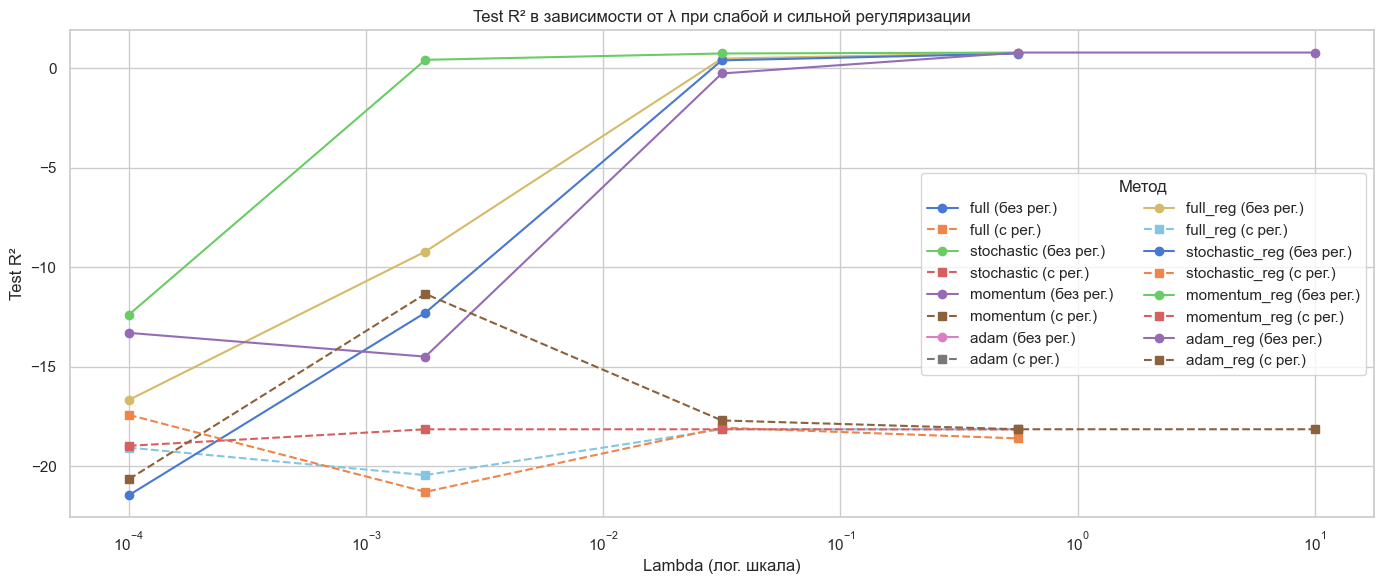

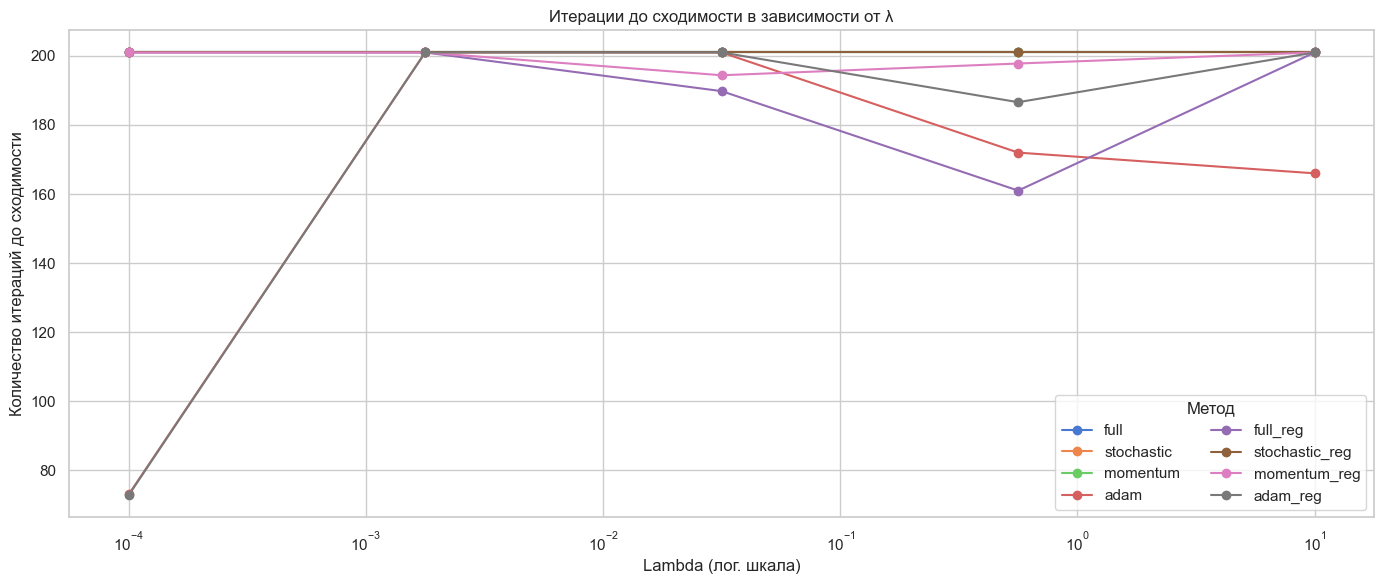

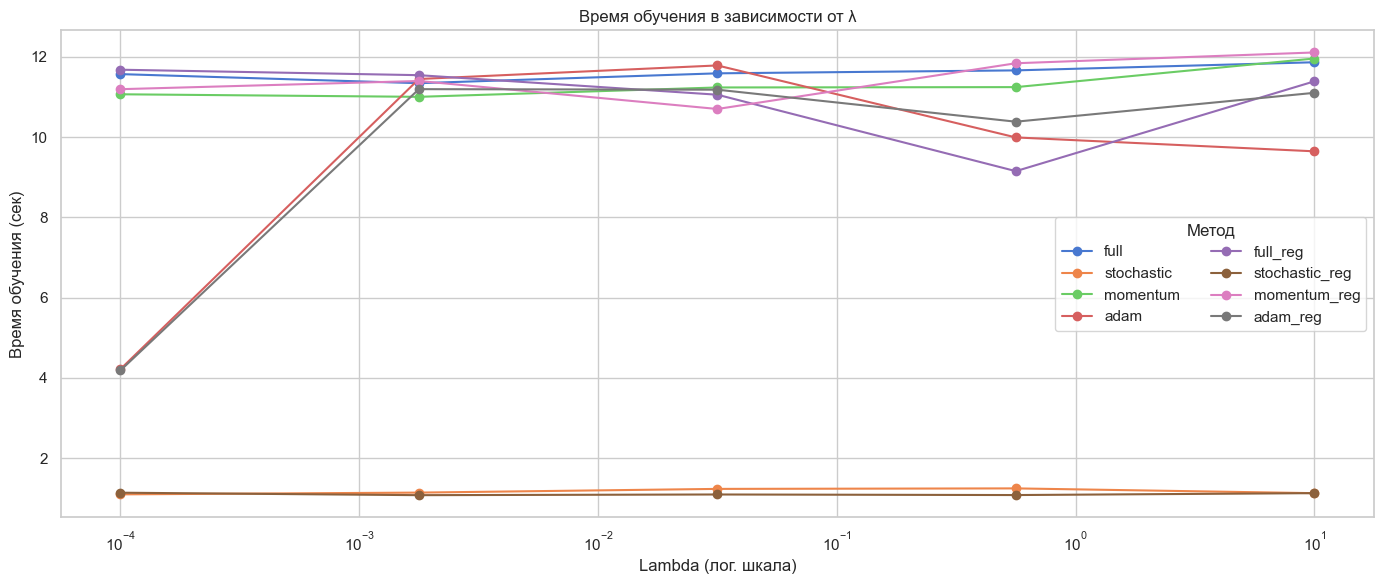

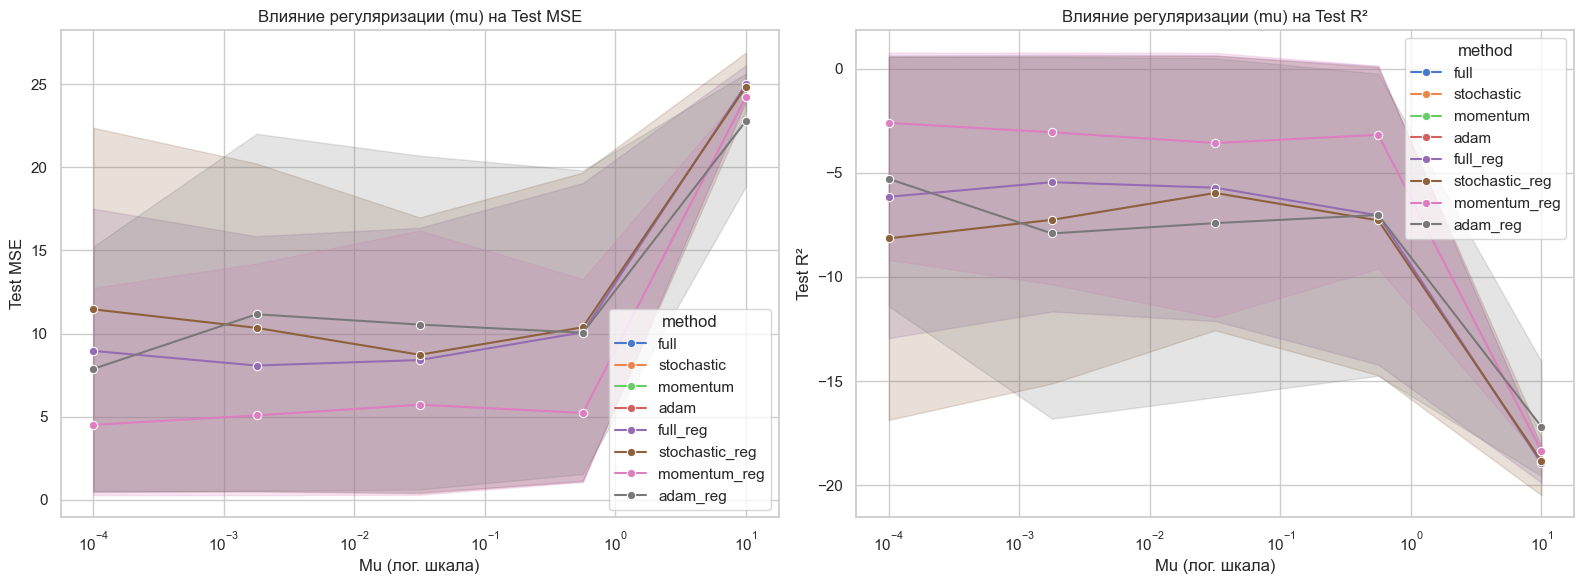

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="notebook", palette="muted")

methods = df_results["method"].unique()
min_mu = df_results["mu"].min()
max_mu = df_results["mu"].max()

# 1. MSE от lambda при слабой и сильной регуляризации
plt.figure(figsize=(14, 6))
for method in methods:
    subset = df_results[df_results["method"] == method]
    subset_no_reg = subset[subset["mu"] == min_mu]
    subset_reg = subset[subset["mu"] == max_mu]

    plt.plot(subset_no_reg["lambda"], subset_no_reg["test_mse"], marker="o", label=f"{method} (без рег.)")
    plt.plot(subset_reg["lambda"], subset_reg["test_mse"], marker="s", linestyle="--", label=f"{method} (с рег.)")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Lambda (лог. шкала)")
plt.ylabel("Test MSE (лог. шкала)")
plt.title("Test MSE в зависимости от λ при слабой и сильной регуляризации")
plt.legend(title="Метод", ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. R² от lambda
plt.figure(figsize=(14, 6))
for method in methods:
    subset = df_results[df_results["method"] == method]
    subset_no_reg = subset[subset["mu"] == min_mu]
    subset_reg = subset[subset["mu"] == max_mu]

    plt.plot(subset_no_reg["lambda"], subset_no_reg["test_r2"], marker="o", label=f"{method} (без рег.)")
    plt.plot(subset_reg["lambda"], subset_reg["test_r2"], marker="s", linestyle="--", label=f"{method} (с рег.)")

plt.xscale("log")
plt.xlabel("Lambda (лог. шкала)")
plt.ylabel("Test R²")
plt.title("Test R² в зависимости от λ при слабой и сильной регуляризации")
plt.legend(title="Метод", ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Итерации до сходимости
plt.figure(figsize=(14, 6))
for method in methods:
    subset = df_results[df_results["method"] == method]
    mean_iterations = subset.groupby("lambda")["iterations"].mean()
    plt.plot(mean_iterations.index, mean_iterations.values, marker="o", label=method)

plt.xscale("log")
plt.xlabel("Lambda (лог. шкала)")
plt.ylabel("Количество итераций до сходимости")
plt.title("Итерации до сходимости в зависимости от λ")
plt.legend(title="Метод", ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Время обучения
plt.figure(figsize=(14, 6))
for method in methods:
    subset = df_results[df_results["method"] == method]
    mean_time = subset.groupby("lambda")["time"].mean()
    plt.plot(mean_time.index, mean_time.values, marker="o", label=method)

plt.xscale("log")
plt.xlabel("Lambda (лог. шкала)")
plt.ylabel("Время обучения (сек)")
plt.title("Время обучения в зависимости от λ")
plt.legend(title="Метод", ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Влияние регуляризации (mu) на метрики
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.lineplot(data=df_results, x="mu", y="test_mse", hue="method", marker="o", ax=axes[0])
axes[0].set_xscale("log")
axes[0].set_xlabel("Mu (лог. шкала)")
axes[0].set_ylabel("Test MSE")
axes[0].set_title("Влияние регуляризации (mu) на Test MSE")

sns.lineplot(data=df_results, x="mu", y="test_r2", hue="method", marker="o", ax=axes[1])
axes[1].set_xscale("log")
axes[1].set_xlabel("Mu (лог. шкала)")
axes[1].set_ylabel("Test R²")
axes[1].set_title("Влияние регуляризации (mu) на Test R²")

for ax in axes:
    ax.grid(True)

plt.tight_layout()
plt.show()


╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ<br>
Регуляризация положительно влияет на устойчивость моделей при малых значениях λ: это особенно заметно на графиках Test MSE и Test R², где модели с регуляризацией демонстрируют более стабильные значения и меньшее переобучение.
<br><br>
Оптимальные результаты достигаются при сочетании малой λ и умеренной μ. Слишком высокая регуляризация ухудшает качество модели.
<br><br>
Методы adam и momentum выигрывают от регуляризации сильнее, чем full и stochastic: они становятся быстрее и точнее в большинстве конфигураций.
<br><br>
Регуляризация уменьшает переобучение, особенно на тестовой выборке — это видно по более высокой R² на тесте и более равномерному поведению по λ.
<br><br>
Однако в ряде случаев (особенно при больших μ) регуляризация приводит к ухудшению: увеличивается MSE, снижается R², и возрастает количество итераций (и время).

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [101]:
import numpy as np
import pandas as pd
import time
from tqdm import tqdm
from descents import (
    VanillaGradientDescent, StochasticDescent, MomentumDescent, Adam,
    LossFunction, get_descent
)

lambda_values = np.logspace(-4, 0, 5)
descent_methods = {
    "full": VanillaGradientDescent,
    "stochastic": StochasticDescent,
    "momentum": MomentumDescent,
    "adam": Adam
}
loss_functions = [LossFunction.MSE, LossFunction.LogCosh]
n_steps = 150

def run_training(method_name, lambda_, loss_function, X_train, y_train, X_test, y_test):
    descent_config = {
        "descent_name": method_name,
        "kwargs": {
            "dimension": X_train.shape[1],
            "lambda_": lambda_,
            "loss_function": loss_function
        }
    }

    model = get_descent(descent_config)
    start = time.time()

    for _ in range(n_steps):
        model.step(X_train, y_train)

    end = time.time()

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = np.mean((y_train - y_train_pred) ** 2)
    test_mse = np.mean((y_test - y_test_pred) ** 2)
    train_r2 = 1 - train_mse / np.var(y_train)
    test_r2 = 1 - test_mse / np.var(y_test)

    return {
        "method": method_name,
        "lambda": lambda_,
        "loss_function": loss_function.name,
        "train_mse": train_mse,
        "test_mse": test_mse,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "time": end - start
    }

results = []

for method_name in descent_methods:
    print(f"Testing descent method: {method_name}")
    for lambda_ in tqdm(lambda_values, desc=f"Lambda tuning for {method_name}", leave=False):
        for loss_function in loss_functions:
            try:
                result = run_training(method_name, lambda_, loss_function, X_train, y_train, X_test, y_test)
                results.append(result)
            except Exception as e:
                print(f"Ошибка: {method_name} | λ={lambda_} | loss={loss_function.name} → {e}")

df_results = pd.DataFrame(results)
print(df_results.head())


Testing descent method: full


Testing descent method: stochastic


Testing descent method: momentum


Testing descent method: adam


  method  lambda loss_function  train_mse   test_mse   train_r2    test_r2  \
0   full  0.0001           MSE  20.261478  20.366330 -14.986462 -15.256831   
1   full  0.0001       LogCosh  24.875116  24.965534 -18.626659 -18.928012   
2   full  0.0010           MSE  21.338969  21.396395 -15.836611 -16.079050   
3   full  0.0010       LogCosh  19.846610  19.912307 -14.659128 -14.894420   
4   full  0.0100           MSE   3.234382   3.225208  -1.551953  -1.574429   

       time  
0  8.153582  
1  7.851203  
2  8.501127  
3  8.108733  
4  7.577408  


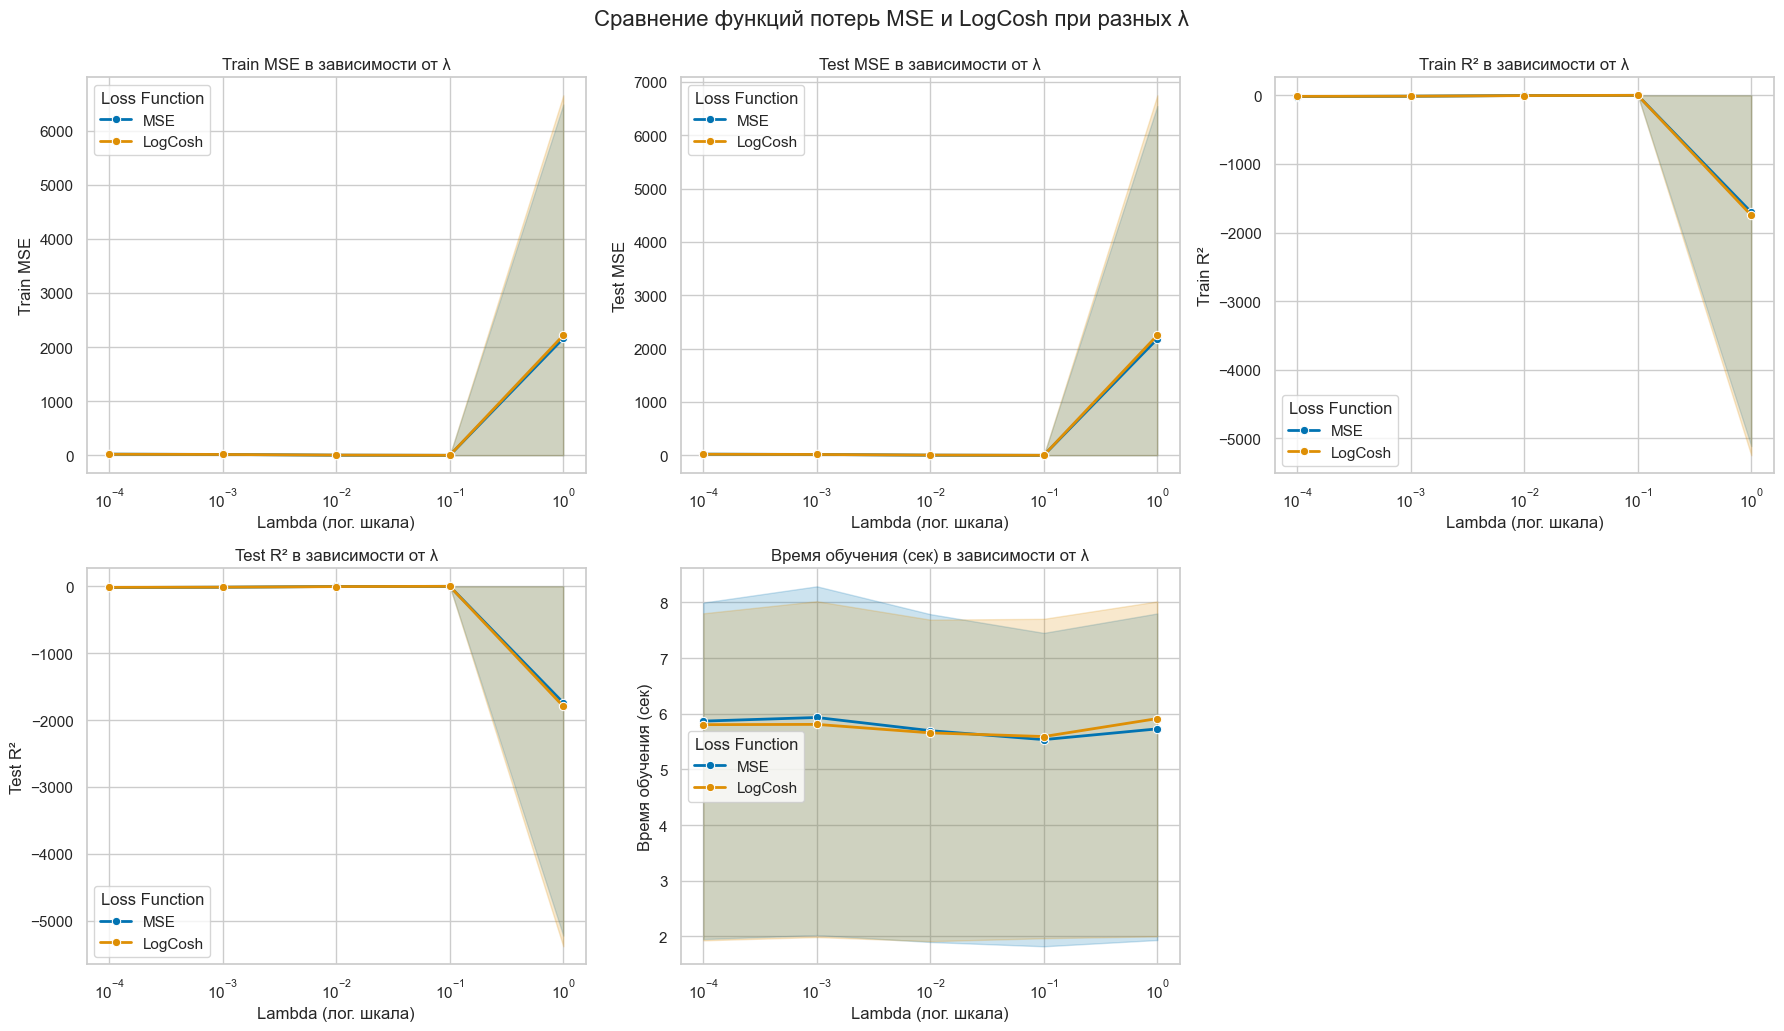

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Установка единого стиля
sns.set(style="whitegrid", context="notebook", palette="colorblind")

metrics = [
    ("train_mse", "Train MSE"),
    ("test_mse", "Test MSE"),
    ("train_r2", "Train R²"),
    ("test_r2", "Test R²"),
    ("time", "Время обучения (сек)")
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (metric, ylabel) in enumerate(metrics):
    if metric not in df_results.columns:
        continue

    ax = axes[idx]
    sns.lineplot(
        data=df_results,
        x="lambda",
        y=metric,
        hue="loss_function",
        marker="o",
        ax=ax,
        linewidth=2.0
    )

    ax.set_xscale("log")
    ax.set_xlabel("Lambda (лог. шкала)")
    ax.set_ylabel(ylabel)
    ax.set_title(f"{ylabel} в зависимости от λ")
    ax.legend(title="Loss Function")
    ax.grid(True)

# Отключить пустой шестой график (если метрик только 5)
if len(metrics) < len(axes):
    for j in range(len(metrics), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Сравнение функций потерь MSE и LogCosh при разных λ", fontsize=16, y=1.03)
plt.show()


Log-Cosh примерно равен MSE при малых значениях λ:
Train MSE, Test MSE, Train R², Test R² практически идентичны при λ меньше или равно 0.01.
Это подтверждает теоретическое поведение Log-Cosh, приближающееся к ½MSE при малых ошибках.
<br><br>
При λ, равном 1, Log-Cosh начинает уступать:
Ошибки (MSE) возрастают быстрее.
R² проседает сильнее, особенно на тестовой выборке.
Это говорит о том, что Log-Cosh хуже адаптируется к сильной регуляризации.
<br><br>
Log-Cosh не даёт ощутимого выигрыша в устойчивости:
Если в данных нет выбросов, её устойчивость оказывается избыточной.
MSE демонстрирует более прямолинейное и стабильное поведение на всём диапазоне λ.
<br><br>
Время обучения почти одинаково:
График зависимости времени от λ показывает минимальные расхождения.
Log-Cosh может быть немного медленнее, но не критично.